### Prof. Pedram Jahangiry

You need to make a copy to your own Google drive if you want to edit the original notebook! Start by opening this notebook on Colab 👇

<a href="https://colab.research.google.com/github/PJalgotrader/Deep_forecasting-USU/blob/main/Lectures%20and%20codes/Module%207-%20Deep%20Sequence%20Modeling/Module7_UnivariateTS_DNN_RNN_intuition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



![logo](https://upload.wikimedia.org/wikipedia/commons/4/44/Huntsman-Wordmark-with-USU-Blue.gif#center)


## 🔗 Links

[![linkedin](https://img.shields.io/badge/LinkedIn-0A66C2?style=for-the-badge&logo=linkedin&logoColor=white)](https://www.linkedin.com/in/pedram-jahangiry-cfa-5778015a)

[![Youtube](https://img.shields.io/badge/youtube_channel-1DA1F2?style=for-the-badge&logo=youtube&logoColor=white&color=FF0000)](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ)

[![Twitter URL](https://img.shields.io/twitter/url/https/twitter.com/PedramJahangiry.svg?style=social&label=Follow%20%40PedramJahangiry)](https://twitter.com/PedramJahangiry)


---


# Module 6- Deep Neural Networks with Tensorflow and Keras

# Installation

* If you want to run your code on Google Colab, there is no installation required. (recommended for the course)
* If you want to run your code locally, then you need to install tensorflow first: https://www.tensorflow.org/install


In [1]:
import tensorflow
tensorflow.__version__

'2.17.0'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/Deep_forecasting-USU/main/data/airline_passengers.csv", index_col="Month")
data.index = pd.to_datetime(data.index)
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Making supervised ML/DL data

In [4]:
test_period = 12
train_period = len(data) - test_period

print(f"Train period: {train_period}")
print(f"Test period: {test_period}")

Train period: 132
Test period: 12


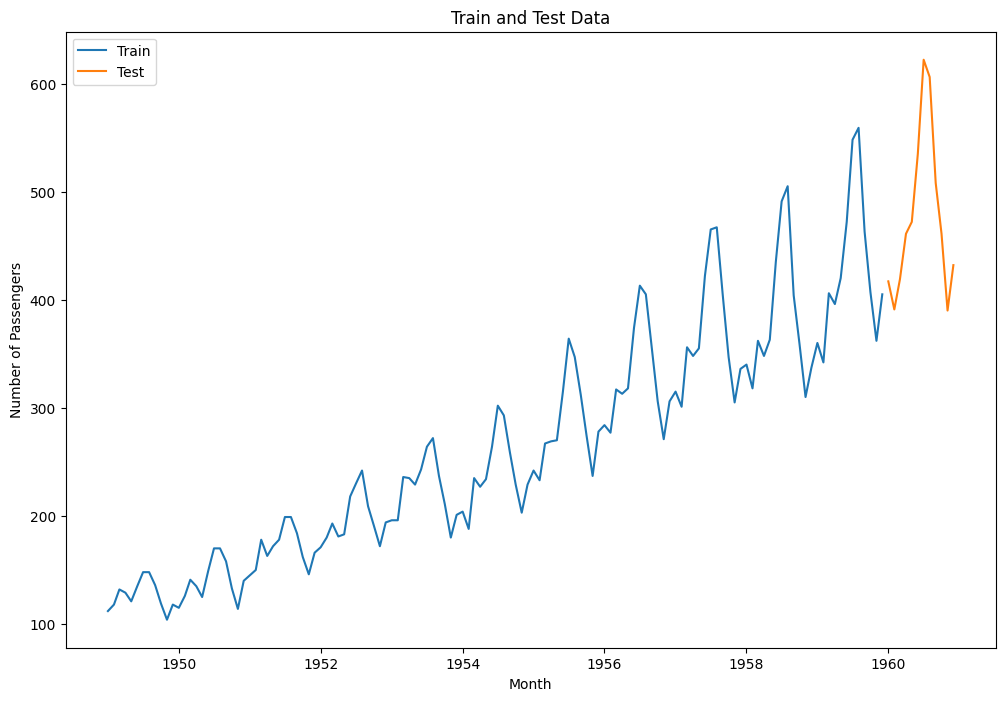

In [5]:
train = data.iloc[:train_period]
test = data.iloc[train_period:]

# plotting the train and test data with different colors
plt.figure(figsize=(12, 8))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.title('Train and Test Data')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

In [6]:
# A Boolean series indicating which rows of the DataFrame data belong to each set (train, test)
train_indicator = (data.index <= train.index[-1])
test_indicator =  (data.index > train.index[-1])

In [7]:
# creating feature space X and target variable y for the training and test datasets
series = data['Passengers'].dropna().to_numpy()

In [8]:
len(series)

144

In [9]:
Tx = 12 # Number of lags! using the past Tx observations to forecast the next one.
Ty = 1 #  Forecasting Ty outputs at once
X = np.array([series[t:t+Tx] for t in range(len(series) - Tx-Ty+1)])
Y = np.array([series[t+Tx: t+Tx+Ty] for t in range(len(series) - Tx-Ty+1)])
N = len(X)

print("X:", X.shape, "Y:", Y.shape, "N:", N)

X: (132, 12) Y: (132, 1) N: 132


In [10]:
Xtrain, Ytrain = X[:-test_period], Y[:-test_period]
Xtest, Ytest = X[-test_period:], Y[-test_period:]

# printing shapes
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(120, 12) (120, 1) (12, 12) (12, 1)


## DNN model

We start from a very simple DNN architecture, later in the course we will improve this by RNN and LSTM.

In [11]:
# creating the DNN model using functional API and build model function.
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def build_DNN_model(Tx, Ty):
    i = Input(shape=(Tx,))
    x = Dense(32, activation='relu')(i)
    x = Dense(16, activation='relu')(x)
    output = Dense(Ty , activation = 'linear')(x)
    model = Model(i, output)
    model.compile(loss='mse', optimizer='adam')
    return model

In [12]:
#Tx = 12 # number of lags
#Ty = 1
model_DNN = build_DNN_model(Tx, Ty)
model_DNN.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

In [65]:
# 12 (inputs) * 32 (neurons) + 32 (bias) = 416
12*32+32

416

In [13]:
# training the model
model_DNN.fit(Xtrain, Ytrain, epochs=100, batch_size=16, validation_data=(Xtest, Ytest))


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 776.4356 - val_loss: 1536.0186
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 670.1627 - val_loss: 1162.8851
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 644.8347 - val_loss: 1070.3444
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 467.6384 - val_loss: 923.9929
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 437.0554 - val_loss: 887.8716
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 374.5928 - val_loss: 767.5034
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 412.4785 - val_loss: 743.0041
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 332.2719 - val_loss: 675.4460
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 354.3595 - val_loss: 929.4302
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 444.1330 - val_loss: 690.1313
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 405.5309 - val_loss: 584.2503
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━

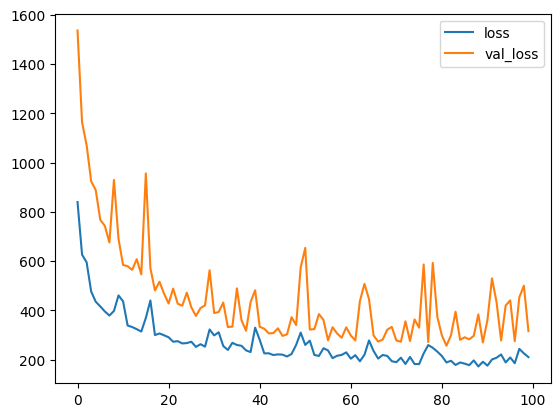

In [14]:
# creating loss dataframe
loss_df = pd.DataFrame(model_DNN.history.history)
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

## One step ahead forecast

At each point in time (either in train or test set) we have access to the past Tx lags actual observations.

In [15]:
train_indicator[:Tx] = False # the first Tx values are not predictable.
# because we need Tx lags to predict the next value

In [16]:
# making predictions with model_DNN
DNN_1step_train_forecast = model_DNN.predict(Xtrain)
DNN_1step_test_forecast = model_DNN.predict(Xtest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [17]:
# plotting one step ahead forecast

data.loc[train_indicator, 'DNN_1step_train_forecast'] = DNN_1step_train_forecast
data.loc[test_indicator, 'DNN_1step_test_forecast'] = DNN_1step_test_forecast
data.head(15)

,Passengers,DNN_1step_train_forecast,DNN_1step_test_forecast
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,NaN,NaN
1949-07-01,148,NaN,NaN
1949-08-01,148,NaN,NaN
1949-09-01,136,NaN,NaN


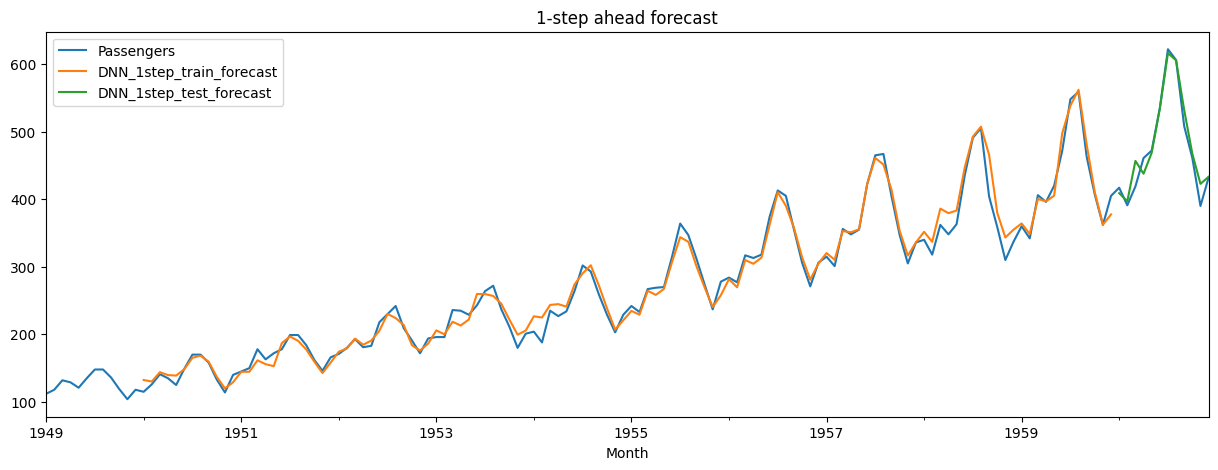

In [18]:
# plot 1-step forecast
data[['Passengers', 'DNN_1step_train_forecast', 'DNN_1step_test_forecast']].plot(figsize=(15, 5))
plt.title('1-step ahead forecast')
plt.show()


## RNN Model

In [19]:
# now let's do a simple RNN model with sequence length of 12
sequence_length = 12
n_features = 1

Preparing the data for sequence modeling:

In [20]:
Tx = sequence_length # Number of lags! using the past Tx observations to forecast the next one.
Ty = 1 #  Forecasting Ty outputs at once
X = np.array([series[t:t+Tx] for t in range(len(series) - Tx-Ty+1)])
# we need to reshape X as sequence of data for RNN:
X = np.array(X).reshape(-1, Tx, 1)


Y = np.array([series[t+Tx: t+Tx+Ty] for t in range(len(series) - Tx-Ty+1)])
N = len(X)

print("X:", X.shape, "Y:", Y.shape, "N:", N)

X: (132, 12, 1) Y: (132, 1) N: 132


In [21]:
Xtrain, Ytrain = X[:-test_period], Y[:-test_period]
Xtest, Ytest = X[-test_period:], Y[-test_period:]

# printing shapes
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(120, 12, 1) (120, 1) (12, 12, 1) (12, 1)


In [22]:
# Creating a simple RNN model
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.1)  

def build_RNN_model(sequence_length, n_features, Ty):
    i = Input(shape=(sequence_length,n_features))
    x = layers.SimpleRNN(16, return_sequences=False)(i) # each recurrent cell has one output when return sequence = False
    output = Dense(Ty , activation = 'linear')(x)
    model = Model(i, output)
    model.compile(loss='mse', optimizer=optimizer)
    return model


In [23]:
model_RNN = build_RNN_model(12,1, 1)
model_RNN.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# (1 feature * 16) + (16 * 16) + 16 (bias terms)
1*16+16*16+16

288

In [24]:
history = model_RNN.fit(Xtrain,Ytrain, epochs=100, validation_data=(Xtest,Ytest))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 83418.0312 - val_loss: 224323.0000
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 81477.2891 - val_loss: 218111.4531
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 74950.2422 - val_loss: 211987.1250
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 68446.7109 - val_loss: 205958.9531
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 75371.2500 - val_loss: 200013.5156
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 68723.9766 - val_loss: 194241.6719
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 61082.9688 - val_loss: 188615.5469
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 63463.9453 - val_loss: 183113.6250
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58171.2617 - val_loss: 177789.3281
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 59744.5664 - val_loss: 172591.5000
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 56807.7031 - val_los

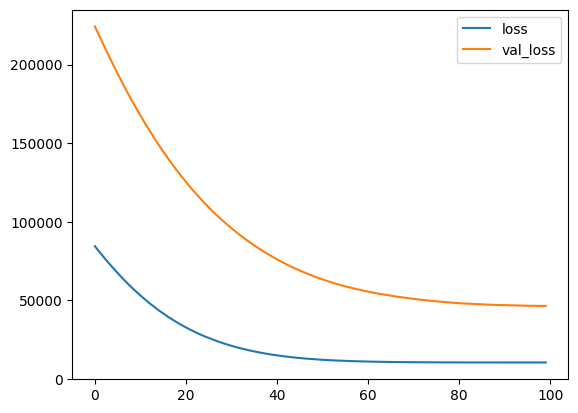

In [25]:
# creating loss dataframe
loss_df = pd.DataFrame(model_RNN.history.history)
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

## One step ahead forecast

At each point in time (either in train or test set) we have access to the past Tx lags actual observations.

In [26]:
train_indicator[:Tx] = False # the first Tx values are not predictable.
# because we need Tx lags to predict the next value

In [27]:
# making predictions with model_DNN
RNN_1step_train_forecast = model_RNN.predict(Xtrain)
RNN_1step_test_forecast = model_RNN.predict(Xtest)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [28]:
# plotting one step ahead forecast

data.loc[train_indicator, 'RNN_1step_train_forecast'] = RNN_1step_train_forecast
data.loc[test_indicator, 'RNN_1step_test_forecast'] = RNN_1step_test_forecast
data.head()

,Passengers,DNN_1step_train_forecast,DNN_1step_test_forecast,RNN_1step_train_forecast,RNN_1step_test_forecast
Month,,,,,
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN,NaN
1949-03-01,132,NaN,NaN,NaN,NaN
1949-04-01,129,NaN,NaN,NaN,NaN
1949-05-01,121,NaN,NaN,NaN,NaN


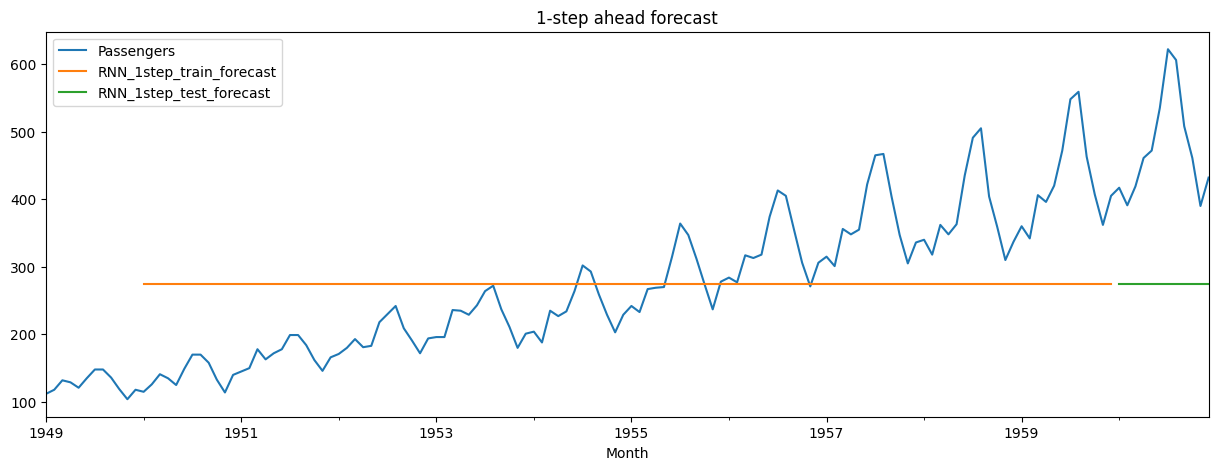

In [29]:
# plot 1-step forecast
data[['Passengers', 'RNN_1step_train_forecast', 'RNN_1step_test_forecast']].plot(figsize=(15, 5))
plt.title('1-step ahead forecast')
plt.show()


# Forecast comparison

In [30]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error

passenger_test = data.loc[test_indicator, 'Passengers']
mape1 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, 'DNN_1step_test_forecast'])
mape2 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, 'RNN_1step_test_forecast'])
print("DNN 1step_test MAPE:", mape1)
print("RNN 1step_test MAPE:", mape2)



DNN 1step_test MAPE: 0.02842439827372308
RNN 1step_test MAPE: 0.41122570262074715


# What's going on? Is RNN failing?

Note that the Dense Neural Network (DNN) model works well on the unprocessed airline passenger data, even without preprocessing steps like differencing or logarithmic transformation, while the Recurrent Neural Network (RNN) requires these preprocessing steps to perform effectively.

This can be attributed to several factors related to the nature of DNNs and how they process information compared to RNNs:

**DNNs and Feature Representation**
1. Independent Features: Treat lags as independent features, capturing trend and seasonality without understanding sequential data.
2. Pattern Mapping: Learn patterns from raw data without requiring stationarity.
3. No Temporal Dynamics: Perform well if input-output relationships are straightforward, even without sequential understanding.

**RNNs and Sequential Data**
1. Sequential Processing: Capture temporal dependencies but can struggle with non-stationary data.
2. Need for Stationarity: Preprocessing (e.g., differencing) helps reveal patterns by stabilizing mean and variance.

**Conclusion**
- DNNs excel with raw data by leveraging absolute lag values.
- RNNs require preprocessing to focus on temporal relationships effectively.
- Model choice and preprocessing depend on data characteristics and forecasting goals.

## Pre-processing the data

In [31]:
data_transformed = data[['Passengers']]
data_transformed.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [32]:
data_transformed['log_passengers'] = np.log(data_transformed['Passengers'])
data_transformed['diff_log_passengers'] = data_transformed['log_passengers'].diff()
data_transformed.head()

,Passengers,log_passengers,diff_log_passengers
Month,,,
1949-01-01,112,4.718499,NaN
1949-02-01,118,4.770685,0.052186
1949-03-01,132,4.882802,0.112117
1949-04-01,129,4.859812,-0.022990
1949-05-01,121,4.795791,-0.064022


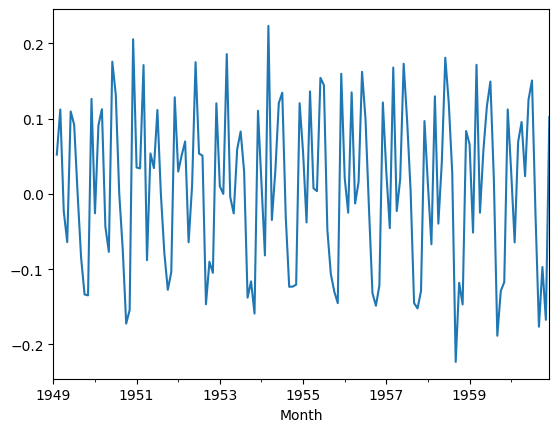

In [33]:
data_transformed['diff_log_passengers'].plot()
plt.show()

In [34]:
series = data_transformed['diff_log_passengers'].dropna().to_numpy()

In [35]:
# now let's do a simple RNN model with sequence length of 12
sequence_length = 12
n_features = 1

Preparing the data for sequence modeling:

In [36]:
Tx = sequence_length # Number of lags! using the past Tx observations to forecast the next one.
Ty = 1 #  Forecasting Ty outputs at once
X = np.array([series[t:t+Tx] for t in range(len(series) - Tx-Ty+1)])
# we need to reshape X as sequence of data for RNN:
X = np.array(X).reshape(-1, Tx, 1)


Y = np.array([series[t+Tx: t+Tx+Ty] for t in range(len(series) - Tx-Ty+1)])
N = len(X)

print("X:", X.shape, "Y:", Y.shape, "N:", N)

X: (131, 12, 1) Y: (131, 1) N: 131


In [37]:
Xtrain, Ytrain = X[:-test_period], Y[:-test_period]
Xtest, Ytest = X[-test_period:], Y[-test_period:]

# printing shapes
print(Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape)

(119, 12, 1) (119, 1) (12, 12, 1) (12, 1)


In [ ]:
# Creating a simple RNN model
from tensorflow.keras import layers

def build_RNN_model(sequence_length, n_features, Ty):
    i = Input(shape=(sequence_length,n_features))
    x = layers.SimpleRNN(16, return_sequences=False)(i) 
    # each recurrent cell has one output when return sequence = False
    output = Dense(Ty , activation = 'linear')(x)
    model = Model(i, output)
    model.compile(loss='mse', optimizer='adam')
    return model


In [39]:
model_RNN = build_RNN_model(12,1, 1)
model_RNN.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 12, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 16)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305 (1.19 KB)

 Trainable params: 305 (1.19 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
history = model_RNN.fit(Xtrain,Ytrain, epochs=100, validation_data=(Xtest,Ytest))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0357 - val_loss: 0.0432
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0309 - val_loss: 0.0308
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0181 - val_loss: 0.0234
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0162 - val_loss: 0.0182
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0127 - val_loss: 0.0147
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0114 - val_loss: 0.0115
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0078 - val_loss: 0.0080
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0061 - val_loss: 0.0066
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0063 - val_loss: 0.0056
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0050 - val_loss: 0.0049
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0043 - val_loss: 0.0051


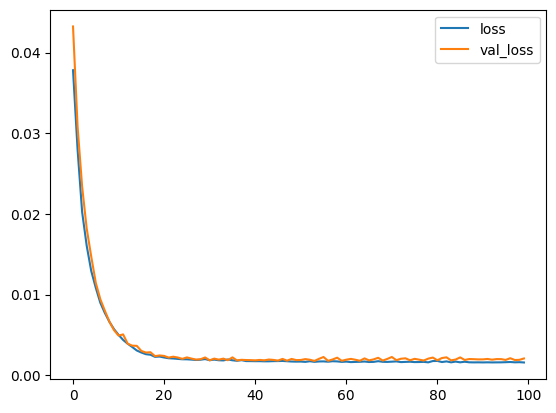

In [41]:
# creating loss dataframe
loss_df = pd.DataFrame(model_RNN.history.history)
loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

## One step ahead forecast

At each point in time (either in train or test set) we have access to the past Tx lags actual observations.

In [42]:
train_indicator[:Tx+1] = False # the first Tx+1 values are not predictable.
# because we need Tx lags to predict the next value and we are using differenced data

In [43]:
data_transformed.head()

,Passengers,log_passengers,diff_log_passengers
Month,,,
1949-01-01,112,4.718499,NaN
1949-02-01,118,4.770685,0.052186
1949-03-01,132,4.882802,0.112117
1949-04-01,129,4.859812,-0.022990
1949-05-01,121,4.795791,-0.064022


In [44]:
# making predictions with model_DNN
RNN_1step_train_forecast = model_RNN.predict(Xtrain).flatten()
RNN_1step_test_forecast = model_RNN.predict(Xtest).flatten()

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000026B2C1DE9D0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [45]:
# Need to calculate the un-differenced predictions
data_transformed['ShiftLogPassengers'] = data_transformed['log_passengers'].shift(1)
prev_log_passenger = data_transformed['ShiftLogPassengers']

In [46]:
# plotting one step ahead forecast
# note we are unlogging the predictions as well.

data_transformed.loc[train_indicator, 'RNN_1step_train_forecast'] = np.exp(prev_log_passenger[train_indicator] + RNN_1step_train_forecast )
data_transformed.loc[test_indicator, 'RNN_1step_test_forecast'] =   np.exp(prev_log_passenger[test_indicator] + RNN_1step_test_forecast )
data_transformed.head()

,Passengers,log_passengers,diff_log_passengers,ShiftLogPassengers,RNN_1step_train_forecast,RNN_1step_test_forecast
Month,,,,,,
1949-01-01,112,4.718499,NaN,NaN,NaN,NaN
1949-02-01,118,4.770685,0.052186,4.718499,NaN,NaN
1949-03-01,132,4.882802,0.112117,4.770685,NaN,NaN
1949-04-01,129,4.859812,-0.022990,4.882802,NaN,NaN
1949-05-01,121,4.795791,-0.064022,4.859812,NaN,NaN


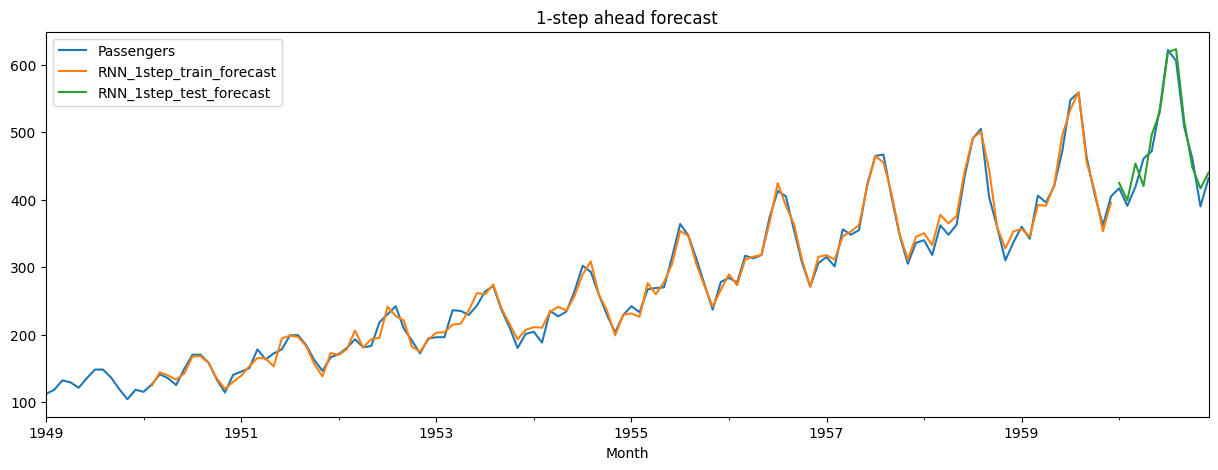

In [47]:
# plot 1-step forecast
data_transformed[['Passengers', 'RNN_1step_train_forecast', 'RNN_1step_test_forecast']].plot(figsize=(15, 5))
plt.title('1-step ahead forecast')
plt.show()


# Forecast comparison

In [48]:
# MAPE
from sklearn.metrics import mean_absolute_percentage_error

passenger_test = data.loc[test_indicator, 'Passengers']
mape1 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, 'DNN_1step_test_forecast'])
mape2 = mean_absolute_percentage_error(passenger_test, data.loc[test_indicator, 'RNN_1step_test_forecast'])
mape3 = mean_absolute_percentage_error(passenger_test, data_transformed.loc[test_indicator, 'RNN_1step_test_forecast'])

print("DNN 1step_test MAPE:", mape1)
print("Raw non-stationary data RNN 1step_test MAPE:", mape2)
print("Transformed stationary data RNN 1step_test MAPE:", mape3)





DNN 1step_test MAPE: 0.02842439827372308
Raw non-stationary data RNN 1step_test MAPE: 0.41122570262074715
Transformed stationary data RNN 1step_test MAPE: 0.03646976586481479


# Done!